Test of NLP analysis. We use pandas read the review table, then create some functions to compute polarity score and generate wordcloud.

In [11]:
#!pip install textblob

#!pip install wordcloud

#import the libraries
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
FILENAME = 'yelp_academic_dataset_review.json'

In [3]:
total_lines = sum(1 for line in open(FILENAME))
print('Total rows:', total_lines)

Total rows: 8635403


In [4]:
df = pd.read_json(FILENAME,lines=True,nrows=100000)

In [5]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01


In [14]:
#clean the text

#create a function to clean the review text
def cleanText(text):
    text = re.sub(r'https?:\/\/\S+','',text) #remove hyper link
    return text

#cleaning the text
df['text']=df['text'].apply(cleanText)

#show the cleaned text
df['text'].head()

0    Apparently Prides Osteria had a rough summer a...
1    This store is pretty good. Not as great as Wal...
2    I called WVM on the recommendation of a couple...
3    I've stayed at many Marriott and Renaissance M...
4    The food is always great here. The service fro...
Name: text, dtype: object

In [15]:
#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create a new column
df['Polarity'] = df['text'].apply(getPolarity)

In [16]:
#show the polarity
df.head(20)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,Polarity
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02,0.141743
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25,0.399583
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06,0.157583
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15,0.043827
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01,0.265278
5,J4a2TuhDasjn2k3wWtHZnQ,RNm_RWkcd02Li2mKPRe7Eg,xGXzsc-hzam-VArK6eTvtw,1,2,0,0,"This place used to be a cool, chill place. Now...",2018-01-21 04:41:03,0.050000
6,28gGfkLs3igtjVy61lh77Q,Q8c91v7luItVB0cMFF_mRA,EXOsmAB1s71WePlQk0WZrA,2,0,0,0,"The setting is perfectly adequate, and the foo...",2006-04-16 02:58:44,0.416667
7,9vqwvFCBG3FBiHGmOHMmiA,XGkAG92TQ3MQUKGX9sLUhw,DbXHNl890xSXNiyRczLWAg,5,0,0,0,Probably one of the better breakfast sandwiche...,2017-12-02 18:16:13,0.187426
8,2l_TDrQ7p-5tANOyiOlkLQ,LWUnzwK0ILquLLZcHHE1Mw,mD-A9KOWADXvfrZfwDs-jw,4,1,0,0,I am definitely a fan of Sports Authority. Th...,2012-05-28 15:00:47,0.402604
9,KKVFopqzcVfcubIBxmIjVA,99RsBrARhhx60UnAC4yDoA,EEHhKSxUvJkoPSzeGKkpVg,5,0,0,0,I work in the Pru and this is the most afforda...,2014-05-07 18:10:21,0.243750


In [41]:
#compute average polarity of each business
def get_stat(bus_id):
    bus_polarity = df[df['business_id']==bus_id]['Polarity']
    avg = round(bus_polarity.mean(),4)
    std = round(bus_polarity.std(),4)
    return avg,std

In [42]:
#test case1
get_stat('zmZ3HkVCeZPBefJJxzdJ7A')

(0.297, 0.1919)

In [31]:
#create a function to plot the Word Cloud of businesses
def get_wordcloud(bus_id):
    bus_txt = df[df['business_id']==bus_id]['text']
    allwords = ''.join([txt for txt in bus_txt])
    print("Based on {} reviews.".format(len(bus_txt)))
    wordCloud = WordCloud(width = 500, height=300, random_state=21, max_font_size=119).generate(allwords)

    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

Based on 109 reviews.


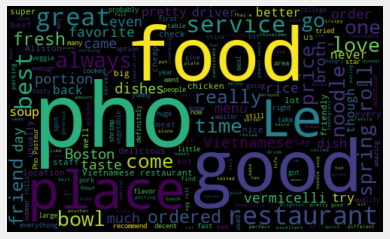

In [32]:
#test case1
get_wordcloud('zmZ3HkVCeZPBefJJxzdJ7A')

Based on 13 reviews.


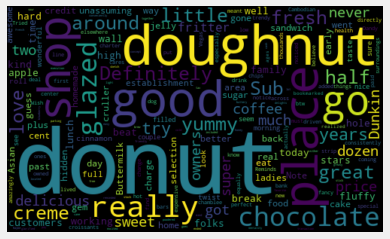

In [33]:
#test case2
get_wordcloud('ZW7aI5FO_3q_vSzI4_zx-Q')

In [28]:
#create a funtion to plot the word cloud of users
def get_wordcloud_user(user_id):
    user_txt = df[df['user_id']==user_id]['text']
    allwords = ''.join([txt for txt in user_txt])
    print("Based on {} reviews.".format(len(user_txt)))
    wordCloud = WordCloud(width = 500, height=300, random_state=21, max_font_size=119).generate(allwords)

    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


Based on 2 reviews.


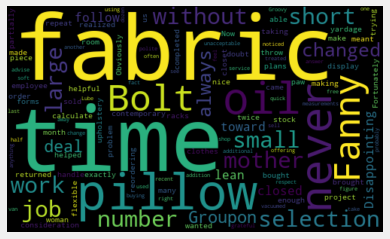

In [29]:
#test case1
get_wordcloud_user('Ngl83gs3n22SzLAsNw2znw')

Based on 1 reviews.


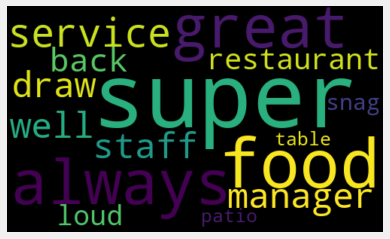

In [30]:
#test case2
get_wordcloud_user('0kA0PAJ8QFMeveQWHFqz2A')